<a href="https://colab.research.google.com/github/kateprashant/TSAI_Repository/blob/master/AssignMent_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.datasets import mnist

(60000, 28, 28)


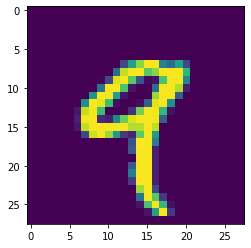

In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[4])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)  # 60000, 28 X 28 X 1 matrices
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [21]:

model2 = Sequential()

 
model2.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #32, 3X3 filters convolve with 28X28X1 input image to give output 32 channels across 26X26 matrices

model2.add(Convolution2D(48, 3,3, activation='relu')) #34,3 X3 filters * with 32X26X26 ->   24 X 24 X48
model2.add(Convolution2D(60, 3,3, activation='relu')) #60,3 X3 filters * with 48X22X22 ->   22 X 22 X60
model2.add(MaxPooling2D(pool_size=(2, 2))) # ->  11 X 11 X 60

model2.add(Convolution2D(48, 3,3, activation='relu')) #48,3 X3 filters * with 11X11X 60->   9 X 9 X48
model2.add(Convolution2D(60, 3,3, activation='relu')) #60,3 X3 filters * with 9X9X48 ->   7 X 7 X60

model2.add(Convolution2D(10, 1, activation='relu')) # 10, 1 X 1 filters convolve with all 60 channels of 7X7 matrices  to give output 10 channels across 7 X 7 matrices
model2.add(Convolution2D(10, 7))  #10, 7X7 filters convolve with 10 channels of 7 X 7 matrices to give output 10 channels across 1 X 1
model2.add(Flatten())
model2.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(60, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(60, (3, 3), activation="relu")`
  if sys.path[0] == '':


In [22]:
model2.summary()
model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
            metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 48)        13872     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 60)        25980     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 60)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 48)          25968     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 60)          25980     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 10)         

In [0]:
model2.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
27808/60000 [============>.................] - ETA: 2:39 - loss: 0.2483 - acc: 0.9228